In [711]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    log_loss, roc_auc_score, classification_report, roc_curve, auc
)
import pickle

In [712]:
# Import data

data = pd.read_csv("C:\\Users\\linds\\OneDrive\\school\\semester4\\Sys An & Des\\Assignment 2\\data.csv")
data.head()

,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,...,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
0,1,0.370594,0.424389,0.405750,0.601457,0.601457,0.998969,0.796887,0.808809,0.302646,...,0.716845,0.009219,0.622879,0.601453,0.827890,0.290202,0.026601,0.564050,1,0.016469
1,1,0.464291,0.538214,0.516730,0.610235,0.610235,0.998946,0.797380,0.809301,0.303556,...,0.795297,0.008323,0.623652,0.610237,0.839969,0.283846,0.264577,0.570175,1,0.020794
2,1,0.426071,0.499019,0.472295,0.601450,0.601364,0.998857,0.796403,0.808388,0.302035,...,0.774670,0.040003,0.623841,0.601449,0.836774,0.290189,0.026555,0.563706,1,0.016474
3,1,0.399844,0.451265,0.457733,0.583541,0.583541,0.998700,0.796967,0.808966,0.303350,...,0.739555,0.003252,0.622929,0.583538,0.834697,0.281721,0.026697,0.564663,1,0.023982
4,1,0.465022,0.538432,0.522298,0.598783,0.598783,0.998973,0.797366,0.809304,0.303475,...,0.795016,0.003878,0.623521,0.598782,0.839973,0.278514,0.024752,0.575617,1,0.035490


In [713]:
# Data info

data.info()
data.describe()

# All features are numerical and no missing data (Nan)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6819 entries, 0 to 6818
Data columns (total 96 columns):
 #   Column                                                    Non-Null Count  Dtype  
---  ------                                                    --------------  -----  
 0   Bankrupt?                                                 6819 non-null   int64  
 1    ROA(C) before interest and depreciation before interest  6819 non-null   float64
 2    ROA(A) before interest and % after tax                   6819 non-null   float64
 3    ROA(B) before interest and depreciation after tax        6819 non-null   float64
 4    Operating Gross Margin                                   6819 non-null   float64
 5    Realized Sales Gross Margin                              6819 non-null   float64
 6    Operating Profit Rate                                    6819 non-null   float64
 7    Pre-tax net Interest Rate                                6819 non-null   float64
 8    After-tax net Int

,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,...,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
count,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,...,6819.000000,6.819000e+03,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.0,6819.000000
mean,0.032263,0.505180,0.558625,0.553589,0.607948,0.607929,0.998755,0.797190,0.809084,0.303623,...,0.807760,1.862942e+07,0.623915,0.607946,0.840402,0.280365,0.027541,0.565358,1.0,0.047578
std,0.176710,0.060686,0.065620,0.061595,0.016934,0.016916,0.013010,0.012869,0.013601,0.011163,...,0.040332,3.764501e+08,0.012290,0.016934,0.014523,0.014463,0.015668,0.013214,0.0,0.050014
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.000000
25%,0.000000,0.476527,0.535543,0.527277,0.600445,0.600434,0.998969,0.797386,0.809312,0.303466,...,0.796750,9.036205e-04,0.623636,0.600443,0.840115,0.276944,0.026791,0.565158,1.0,0.024477
50%,0.000000,0.502706,0.559802,0.552278,0.605997,0.605976,0.999022,0.797464,0.809375,0.303525,...,0.810619,2.085213e-03,0.623879,0.605998,0.841179,0.278778,0.026808,0.565252,1.0,0.033798
75%,0.000000,0.535563,0.589157,0.584105,0.613914,0.613842,0.999095,0.797579,0.809469,0.303585,...,0.826455,5.269777e-03,0.624168,0.613913,0.842357,0.281449,0.026913,0.565725,1.0,0.052838
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,9.820000e+09,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0,1.000000


In [714]:
# Check for duplicates

data.duplicated().sum()

0

In [715]:
# Clean column names by stripping extra whitespace
data.columns = data.columns.str.strip()

# Display the column names to inspect their exact format
data.columns.tolist()

['Bankrupt?',
 'ROA(C) before interest and depreciation before interest',
 'ROA(A) before interest and % after tax',
 'ROA(B) before interest and depreciation after tax',
 'Operating Gross Margin',
 'Realized Sales Gross Margin',
 'Operating Profit Rate',
 'Pre-tax net Interest Rate',
 'After-tax net Interest Rate',
 'Non-industry income and expenditure/revenue',
 'Continuous interest rate (after tax)',
 'Operating Expense Rate',
 'Research and development expense rate',
 'Cash flow rate',
 'Interest-bearing debt interest rate',
 'Tax rate (A)',
 'Net Value Per Share (B)',
 'Net Value Per Share (A)',
 'Net Value Per Share (C)',
 'Persistent EPS in the Last Four Seasons',
 'Cash Flow Per Share',
 'Revenue Per Share (Yuan ¥)',
 'Operating Profit Per Share (Yuan ¥)',
 'Per Share Net profit before tax (Yuan ¥)',
 'Realized Sales Gross Profit Growth Rate',
 'Operating Profit Growth Rate',
 'After-tax Net Profit Growth Rate',
 'Regular Net Profit Growth Rate',
 'Continuous Net Profit Growth 

In [716]:
# Check the distribution of the target variable (Bankrupt?)
target_distribution = data['Bankrupt?'].value_counts(normalize=True)
target_distribution

Bankrupt?
0    0.967737
1    0.032263
Name: proportion, dtype: float64

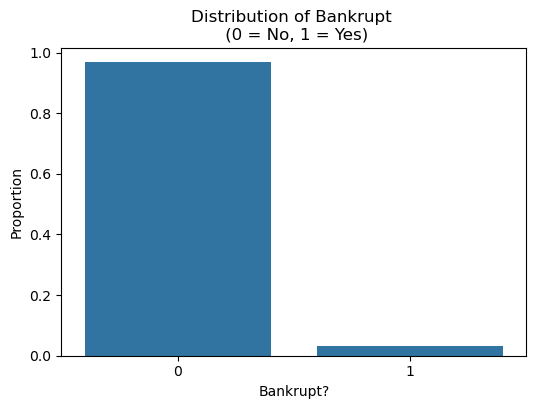

In [717]:
# Plot the distribution of the target variable
plt.figure(figsize=(6, 4))
sns.barplot(x=target_distribution.index, y=target_distribution.values)
plt.title('Distribution of Bankrupt \n (0 = No, 1 = Yes)')
plt.xlabel('Bankrupt?')
plt.ylabel('Proportion')
plt.show()

Highly imbalanced

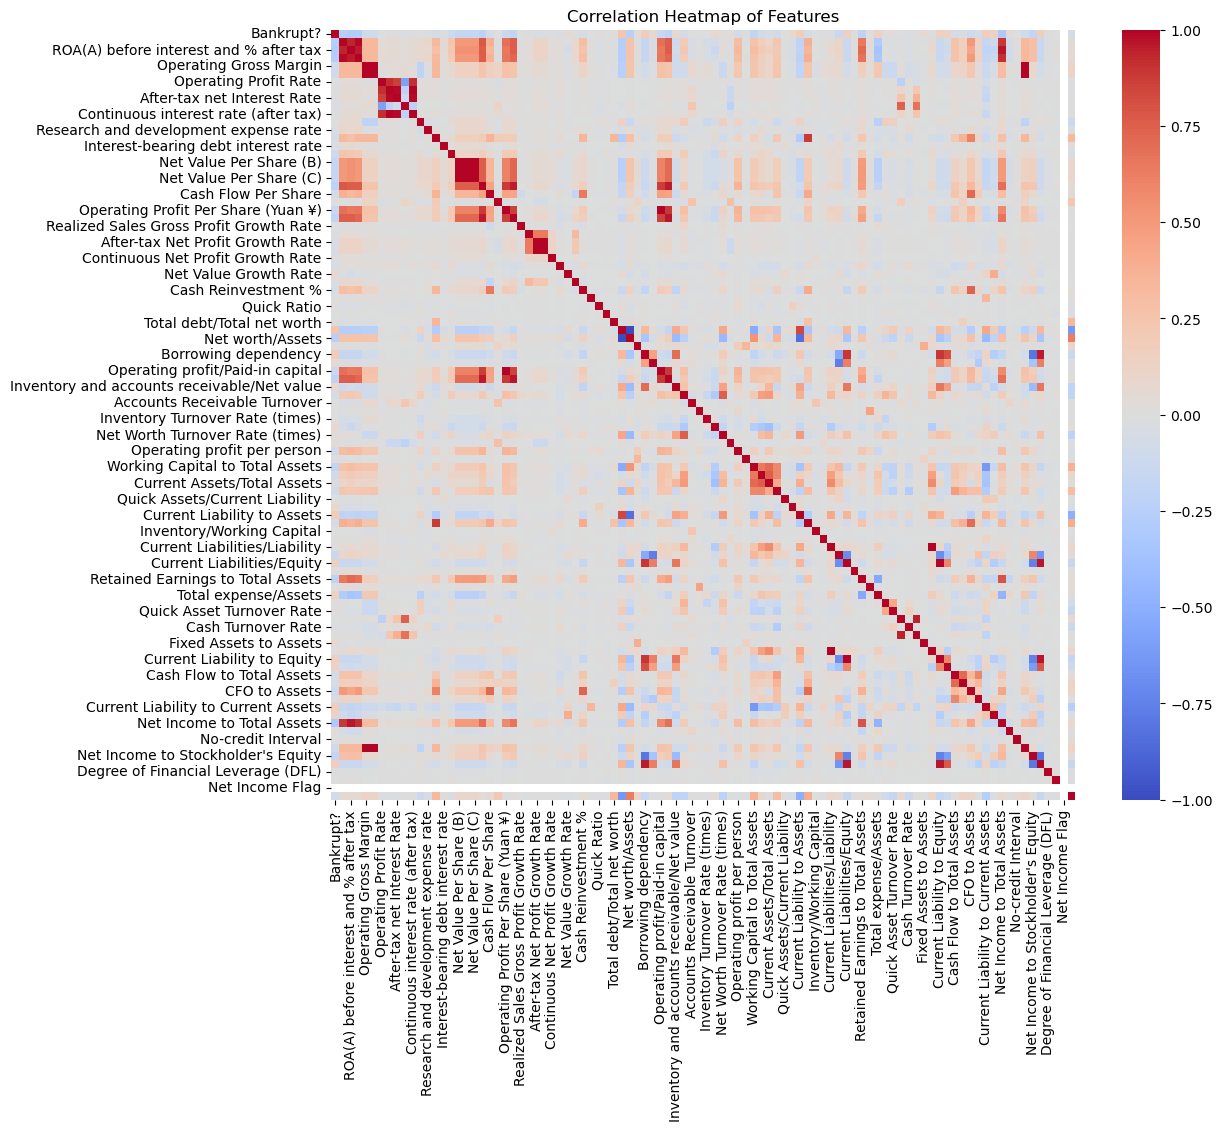

In [718]:
# Calculate correlation matrix and find highly correlated features
correlation_matrix = data.corr()

# Plot a heatmap for the correlation matrix (sample)
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, cmap='coolwarm', annot=False)
plt.title('Correlation Heatmap of Features')
plt.show()

In [719]:
# Identify pairs of highly correlated features (correlation > 0.9)

high_corr_pairs = correlation_matrix[(correlation_matrix.abs() > 0.9) & (correlation_matrix.abs() < 1.0)]
high_corr_pairs = high_corr_pairs.stack().reset_index()
high_corr_pairs.columns = ['Feature 1', 'Feature 2', 'Correlation']
high_corr_pairs = high_corr_pairs.sort_values(by='Correlation', ascending=False)

high_corr_pairs.head(96)

,Feature 1,Feature 2,Correlation
47,Gross Profit to Sales,Operating Gross Margin,1.000000
9,Operating Gross Margin,Gross Profit to Sales,1.000000
25,Net Value Per Share (A),Net Value Per Share (C),0.999837
27,Net Value Per Share (C),Net Value Per Share (A),0.999837
8,Operating Gross Margin,Realized Sales Gross Margin,0.999518
10,Realized Sales Gross Margin,Operating Gross Margin,0.999518
48,Gross Profit to Sales,Realized Sales Gross Margin,0.999518
11,Realized Sales Gross Margin,Gross Profit to Sales,0.999518
24,Net Value Per Share (A),Net Value Per Share (B),0.999342
22,Net Value Per Share (B),Net Value Per Share (A),0.999342


In [720]:
# Recalculate the correlation matrix after data scaling and preprocessing
correlation_matrix = data.corr().abs()

# Define a correlation threshold (e.g., 0.9)
threshold = 0.9

# Identify pairs of highly correlated features (excluding self-correlation)
high_corr_pairs = (correlation_matrix.where(
    np.triu(np.ones(correlation_matrix.shape), k=1).astype(bool))
    .stack()
    .reset_index())

high_corr_pairs.columns = ['Feature 1', 'Feature 2', 'Correlation']

# Filter pairs with correlation above the threshold
high_corr_pairs = high_corr_pairs[high_corr_pairs['Correlation'] > threshold]

# Identify features to drop systematically to reduce multicollinearity
features_to_drop = set()
for _, row in high_corr_pairs.iterrows():
    # Prefer dropping the feature that has higher correlation with other features
    if row['Feature 1'] not in features_to_drop and row['Feature 2'] not in features_to_drop:
        corr_with_others_1 = correlation_matrix[row['Feature 1']].sum()
        corr_with_others_2 = correlation_matrix[row['Feature 2']].sum()
        if corr_with_others_1 >= corr_with_others_2:
            features_to_drop.add(row['Feature 1'])
        else:
            features_to_drop.add(row['Feature 2'])


In [721]:
# Drop the selected features
data = data.drop(columns=list(features_to_drop))

In [722]:
# Check the final shape of the data and the remaining features
data.shape, list(features_to_drop)

((6819, 77),
 ['Working capitcal Turnover Rate',
  'Operating Gross Margin',
  'ROA(B) before interest and depreciation after tax',
  'Net Value Per Share (B)',
  'Borrowing dependency',
  'Pre-tax net Interest Rate',
  'Continuous interest rate (after tax)',
  'Net Value Per Share (A)',
  'ROA(A) before interest and % after tax',
  'Operating Profit Per Share (Yuan ¥)',
  'Current Liabilities/Equity',
  'Liability to Equity',
  'Net profit before tax/Paid-in capital',
  'Current Liabilities/Liability',
  'Persistent EPS in the Last Four Seasons',
  'ROA(C) before interest and depreciation before interest',
  'Net worth/Assets',
  'Gross Profit to Sales',
  'After-tax Net Profit Growth Rate'])

In [723]:
data

,Bankrupt?,Realized Sales Gross Margin,Operating Profit Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,Operating Expense Rate,Research and development expense rate,Cash flow rate,Interest-bearing debt interest rate,Tax rate (A),...,Current Liability to Current Assets,Liability-Assets Flag,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Net Income to Stockholder's Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
0,1,0.601457,0.998969,0.808809,0.302646,1.256969e-04,0.000000e+00,0.458143,7.250725e-04,0.000000,...,0.118250,0,0.716845,0.009219,0.622879,0.827890,0.026601,0.564050,1,0.016469
1,1,0.610235,0.998946,0.809301,0.303556,2.897851e-04,0.000000e+00,0.461867,6.470647e-04,0.000000,...,0.047775,0,0.795297,0.008323,0.623652,0.839969,0.264577,0.570175,1,0.020794
2,1,0.601364,0.998857,0.808388,0.302035,2.361297e-04,2.550000e+07,0.458521,7.900790e-04,0.000000,...,0.025346,0,0.774670,0.040003,0.623841,0.836774,0.026555,0.563706,1,0.016474
3,1,0.583541,0.998700,0.808966,0.303350,1.078888e-04,0.000000e+00,0.465705,4.490449e-04,0.000000,...,0.067250,0,0.739555,0.003252,0.622929,0.834697,0.026697,0.564663,1,0.023982
4,1,0.598783,0.998973,0.809304,0.303475,7.890000e+09,0.000000e+00,0.462746,6.860686e-04,0.000000,...,0.047725,0,0.795016,0.003878,0.623521,0.839973,0.024752,0.575617,1,0.035490
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6814,0,0.604462,0.998992,0.809331,0.303510,1.510213e-04,4.500000e+09,0.463734,1.790179e-04,0.113372,...,0.027951,0,0.799927,0.000466,0.623620,0.840359,0.027064,0.566193,1,0.029890
6815,0,0.598308,0.998992,0.809327,0.303520,5.220000e+09,1.440000e+09,0.461978,2.370237e-04,0.371596,...,0.031470,0,0.799748,0.001959,0.623931,0.840306,0.027009,0.566018,1,0.038284
6816,0,0.610213,0.998984,0.809317,0.303512,2.509312e-04,1.039086e-04,0.472189,0.000000e+00,0.490839,...,0.007542,0,0.797778,0.002840,0.624156,0.840138,0.026791,0.565158,1,0.097649
6817,0,0.607850,0.999074,0.809399,0.303498,1.236154e-04,2.510000e+09,0.476123,2.110211e-04,0.181294,...,0.022916,0,0.811808,0.002837,0.623957,0.841084,0.026822,0.565302,1,0.044009


In [724]:
# Scale numerical features using StandardScaler
scaler = StandardScaler()
numerical_features = data.drop(columns=['Bankrupt?']).columns
data[numerical_features] = scaler.fit_transform(data[numerical_features])

In [725]:
data.shape 
data.head()

,Bankrupt?,Realized Sales Gross Margin,Operating Profit Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,Operating Expense Rate,Research and development expense rate,Cash flow rate,Interest-bearing debt interest rate,Tax rate (A),...,Current Liability to Current Assets,Liability-Assets Flag,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Net Income to Stockholder's Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
0,1,-0.382638,0.016456,-0.020165,-0.087479,-0.616334,-0.750713,-0.545256,-0.151921,-0.829388,...,2.812493,-0.034272,-2.254317,-0.049491,-0.084274,-0.861611,-0.060031,-0.098978,0.0,-0.622067
1,1,0.136307,0.014671,0.015966,-0.005957,-0.616334,-0.750713,-0.326632,-0.151921,-0.829388,...,0.527485,-0.034272,-0.309033,-0.049491,-0.021388,-0.029804,15.129816,0.364559,0.0,-0.535573
2,1,-0.388177,0.007858,-0.051183,-0.142238,-0.616334,-0.740898,-0.523098,-0.151921,-0.829388,...,-0.199721,-0.034272,-0.820510,-0.049491,-0.005984,-0.249820,-0.062961,-0.125015,0.0,-0.621960
3,1,-1.441832,-0.004257,-0.008676,-0.024491,-0.616334,-0.750713,-0.101310,-0.151921,-0.829388,...,1.158899,-0.034272,-1.691222,-0.049491,-0.080226,-0.392864,-0.053903,-0.052562,0.0,-0.471826
4,1,-0.540708,0.016758,0.016186,-0.013254,1.820772,-0.750713,-0.275028,-0.151921,-0.829388,...,0.525867,-0.034272,-0.316008,-0.049491,-0.032052,-0.029564,-0.178037,0.776395,0.0,-0.241715


In [726]:
# Separate features and target variable
X = data.drop(columns=['Bankrupt?'])
y = data['Bankrupt?']

In [727]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [728]:
# Apply SMOTE to the training data
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

In [729]:
# Check the distribution after SMOTE
y_train_smote.value_counts()

Bankrupt?
0    5279
1    5279
Name: count, dtype: int64

Logistic Regression

In [730]:
# Train the Logistic Regression model
model = LogisticRegression(class_weight='balanced', random_state=42, max_iter=1000)
model.fit(X_train_smote, y_train_smote)

LogisticRegression(class_weight='balanced', max_iter=1000, random_state=42)

In [731]:
# Make predictions and calculate probabilities
y_pred = model.predict(X_test)
y_proba = model.predict_proba(X_test)[:, 1]

In [732]:
# Evaluation Metrics
logloss = log_loss(y_test, y_proba)
roc_auc = roc_auc_score(y_test, y_proba)
report = classification_report(y_test, y_pred)

In [733]:
# Print Evaluation Metrics
print(f"Log Loss: {logloss:.4f}")
print(f"ROC AUC: {roc_auc:.4f}")
print("\nClassification Report:\n", report)

Log Loss: 0.3809
ROC AUC: 0.9109

Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.88      0.93      1320
           1       0.19      0.80      0.30        44

    accuracy                           0.88      1364
   macro avg       0.59      0.84      0.62      1364
weighted avg       0.97      0.88      0.91      1364



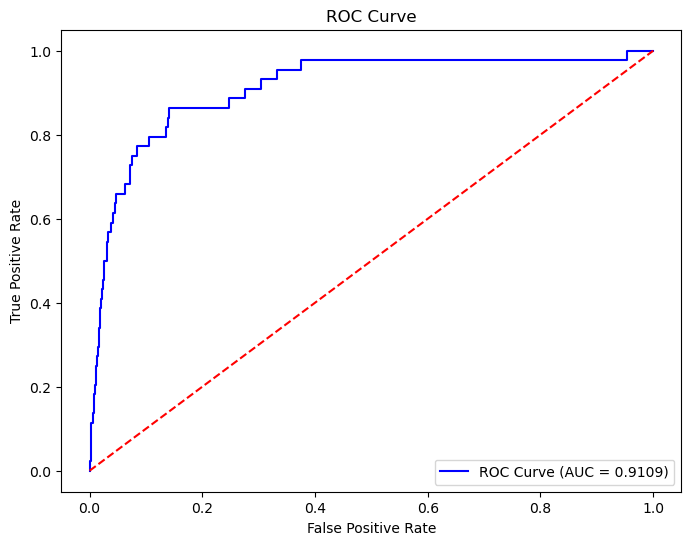

In [734]:
# Plot ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_proba)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC Curve (AUC = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

In [735]:
# Save the trained model to a file
with open('model/logistic_regression_model.pkl', 'wb') as f:
    pickle.dump(model, f)

print("Model saved successfully!")

Model saved successfully!


In [736]:
# Save the cleaned and preprocessed data
data.to_csv("model/cleaned_data.csv", index=False)
print("Cleaned data saved successfully!")

Cleaned data saved successfully!


In [737]:
# Load the cleaned data
data = pd.read_csv('model/cleaned_data.csv')

In [738]:
# Feature Importance Calculation and Visualization

# Get the feature names (excluding the target column)
features = [col for col in X.columns]

In [739]:
# Get the feature importance from the model coefficients
importance = np.abs(model.coef_[0])

In [740]:
# Create a DataFrame for feature importance
importance_df = pd.DataFrame({'Feature': features, 'Importance': importance})

In [741]:
# Sort the DataFrame by importance in descending order
importance_df = importance_df.sort_values(by='Importance', ascending=False)

In [742]:
# Sort the DataFrame by importance in descending order
importance_df = importance_df.sort_values(by='Importance', ascending=False)

In [743]:
# Get the top 15 features
top_features = importance_df.head(15)

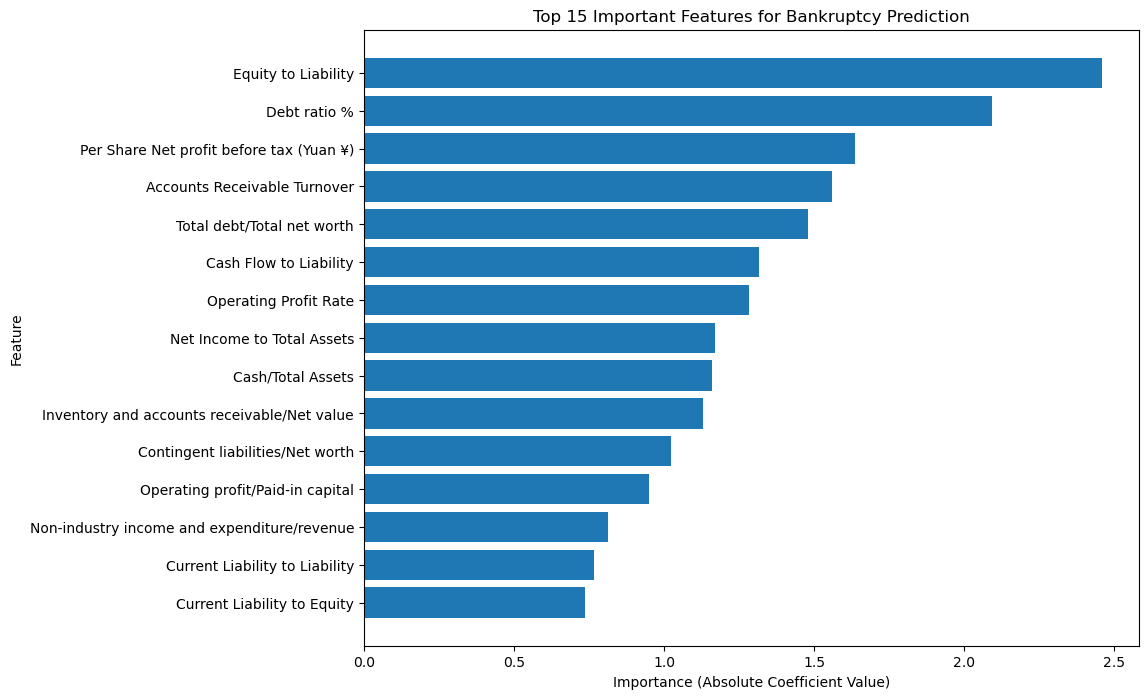

Top 15 Important Features:
                                        Feature  Importance
75                          Equity to Liability    2.458096
25                                 Debt ratio %    2.092945
12     Per Share Net profit before tax (Yuan ¥)    1.637494
31                 Accounts Receivable Turnover    1.558930
24                   Total debt/Total net worth    1.480020
63                       Cash Flow to Liability    1.315981
1                         Operating Profit Rate    1.282963
68                   Net Income to Total Assets    1.168488
42                            Cash/Total Assets    1.160892
29  Inventory and accounts receivable/Net value    1.128707
27             Contingent liabilities/Net worth    1.024389
28             Operating profit/Paid-in capital    0.949230
3   Non-industry income and expenditure/revenue    0.812070
59               Current Liability to Liability    0.766249
60                  Current Liability to Equity    0.737121


In [744]:
# Plotting the top features
plt.figure(figsize=(10, 8))
plt.barh(top_features['Feature'], top_features['Importance'])
plt.xlabel('Importance (Absolute Coefficient Value)')
plt.ylabel('Feature')
plt.title('Top 15 Important Features for Bankruptcy Prediction')
plt.gca().invert_yaxis()
plt.show()

# Display the top features
print("Top 15 Important Features:")
print(top_features)

In [745]:
# Save the original top 15 features to a CSV file for API
top_features.to_csv("model/top_15_features.csv", index=False)
print("Original Top 15 Important Features:")
print(top_features)

Original Top 15 Important Features:
                                        Feature  Importance
75                          Equity to Liability    2.458096
25                                 Debt ratio %    2.092945
12     Per Share Net profit before tax (Yuan ¥)    1.637494
31                 Accounts Receivable Turnover    1.558930
24                   Total debt/Total net worth    1.480020
63                       Cash Flow to Liability    1.315981
1                         Operating Profit Rate    1.282963
68                   Net Income to Total Assets    1.168488
42                            Cash/Total Assets    1.160892
29  Inventory and accounts receivable/Net value    1.128707
27             Contingent liabilities/Net worth    1.024389
28             Operating profit/Paid-in capital    0.949230
3   Non-industry income and expenditure/revenue    0.812070
59               Current Liability to Liability    0.766249
60                  Current Liability to Equity    0.737121


In [746]:
# Subset the data with the selected top 15 features
top_features = pd.read_csv("model/top_15_features.csv")['Feature'].tolist()
X = data[top_features]
y = data['Bankrupt?']

In [747]:
# Drop rows with any NaN values after feature selection
X = X.dropna()
y = y.loc[X.index]

In [748]:
# Train-test split with selected features
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


In [749]:
# Apply SMOTE again with the selected features
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

In [750]:
# Train the final logistic regression model with top 15 features
model = LogisticRegression(class_weight='balanced', random_state=42, max_iter=1000)
model.fit(X_train_smote, y_train_smote)

LogisticRegression(class_weight='balanced', max_iter=1000, random_state=42)

In [753]:
# Load the top 15 features from the file and sanitize them
top_features = pd.read_csv("model/top_15_features.csv")['Feature'].tolist()

In [754]:
# Sanitize feature names to be valid Python identifiers
cleaned_features = [
    feature.replace(" ", "_").replace("%", "pct").replace("/", "_")
    .replace("(", "").replace(")", "").replace("¥", "").replace("-", "_")
    for feature in top_features
]

In [755]:
# Keep only the top 15 features for training
X = data[top_features]
y = data["Bankrupt?"]

In [756]:
# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [757]:
# Train the logistic regression model
model = LogisticRegression(random_state=42)
model.fit(X_scaled, y)

LogisticRegression(random_state=42)

In [758]:
# Save the model
with open("model/logistic_regression_model.pkl", "wb") as f:
    pickle.dump(model, f)

In [759]:
# Save the scaler
with open("model/scaler.pkl", "wb") as f:
    pickle.dump(scaler, f)

print("Model and scaler saved successfully!")

Model and scaler saved successfully!
